___
# Historical Numbers Notebook
### This notebook includes all our data analysis work involving historical exposure numbers in general.

In [1]:
#Importing the needed libraries.
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

___

In [2]:
#Implementing our Data set.
worksheets = pd.ExcelFile('../../data/BU-UG/BU-UG-FYP.xlsx')
worksheets.sheet_names

worksheet = {}
for ws_name in worksheets.sheet_names:
    worksheet[ws_name] = pd.read_excel('../../data/BU-UG/BU-UG-FYP.xlsx', sheet_name = ws_name)

In [3]:
#Creating dataframes for our analysis.
df_vulnerabilities = worksheet['cves']
df_vulnerabilities=df_vulnerabilities[['vulnerability','totalcount']]
df_weekly = pd.read_csv('../../data/BU-UG/historical-numbers.csv', index_col="capture_date", parse_dates=True)

In [4]:
df_vulnerabilities.sort_values(by='totalcount', ascending=False).head(10)

,vulnerability,totalcount
38,CVE-2017-15906,7074719
172,CVE-2018-1312,6778992
233,CVE-2019-0220,5853471
106,CVE-2017-7679,5463625
187,CVE-2018-17199,5365122
183,CVE-2018-15919,5306940
166,CVE-2018-1283,5065431
37,CVE-2017-15715,5065312
36,CVE-2017-15710,5065269
128,CVE-2017-9798,4006984


In [5]:
df_weekly

,CVE-2017-1000369,CVE-2017-1000600,CVE-2017-1001000,CVE-2017-10140,CVE-2017-10391,CVE-2017-11142,CVE-2017-11143,CVE-2017-11144,CVE-2017-11145,CVE-2017-11147,...,CVE-2019-9712,CVE-2019-9713,CVE-2019-9714,CVE-2019-9787,CVE-2020-0796,CVE-2020-11651,CVE-2020-11652,CVE-2020-1938,CVE-2020-5902,MS17-010
capture_date,,,,,,,,,,,,,,,,,,,,,
2020-10-03,90971,50014,1748,251,558,111595,55086,160107,160110,47738,...,135,38,148,73105,125506,114,114,40958,580,11502
2020-10-17,84817,50139,1873,245,539,108263,53192,152423,152423,46790,...,115,43,124,75876,112161,101,101,38218,526,10304
2020-10-31,82634,54701,2239,227,518,105431,51724,142408,142410,45710,...,121,41,129,86144,108770,94,94,36884,457,10016
2020-11-14,82310,53499,2190,218,513,104246,51028,141025,141025,45308,...,118,38,124,84224,109065,98,98,36678,437,10034
2020-11-28,85211,52510,2169,238,520,102238,49465,138838,138837,45048,...,104,34,110,82234,126606,108,108,37969,433,11374
2020-12-12,82945,49593,2011,230,503,95485,46942,125812,125812,41569,...,63,20,69,77157,126424,84,84,37342,349,11015
2020-12-26,82093,48544,1960,231,503,95098,47074,124351,124349,41208,...,43,13,47,75613,127681,77,77,37398,339,10974
2021-01-09,78114,50351,1991,230,480,94498,47365,120174,120173,40571,...,11,3,12,77633,119354,74,74,35806,252,9883
2021-01-23,79369,48038,1921,237,482,94484,47661,119758,119759,40217,...,4,0,4,73963,125692,73,73,36182,256,10145


In [6]:
df_top10CVEs = df_weekly[['CVE-2017-15906', 'CVE-2018-1312','CVE-2019-0220','CVE-2017-7679','CVE-2018-17199',
                          'CVE-2018-15919','CVE-2018-1283','CVE-2017-15715','CVE-2017-15710','CVE-2017-9798']]
df_top10CVEs

#df_top10CVEs = df_weekly.nlargest(10, ['totalcount'])

,CVE-2017-15906,CVE-2018-1312,CVE-2019-0220,CVE-2017-7679,CVE-2018-17199,CVE-2018-15919,CVE-2018-1283,CVE-2017-15715,CVE-2017-15710,CVE-2017-9798
capture_date,,,,,,,,,,
2020-10-03,8007451,7158125,5812795,5768602,5403307,5787335,5104467,5104354,5104147,4010563
2020-10-17,7488456,6965735,5679924,5607679,5277226,5395111,4985493,4985493,4985127,3915102
2020-10-31,7179219,6825053,5590471,5493195,5182672,5143755,4894836,4894748,4894685,3845326
2020-11-14,7170113,6791142,5568223,5464562,5160836,5118584,4872624,4872498,4872446,3828037
2020-11-28,7647885,6951092,5710012,5592075,5281211,5477019,4976805,4976627,4976598,3909679
2020-12-12,7424681,6832601,5715466,5465511,5275250,5387539,4963606,4963509,4963177,3878987
2020-12-26,7432426,6865810,5764195,5487808,5317840,5410358,5002955,5002801,5001943,3908711
2021-01-09,7033088,6766923,5757529,5401953,5303476,5181640,4991441,4991441,4990128,3904906
2021-01-23,7183919,6832628,5838046,5460135,5371153,5309113,5056946,5059159,5057807,3966401


___
## Line Plots

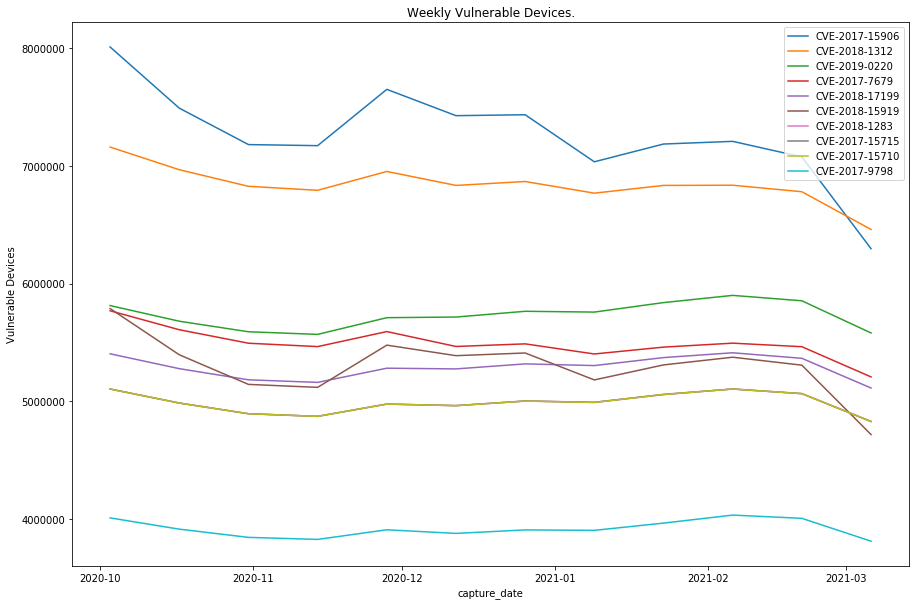

In [7]:
plt.figure(figsize=(15,10))
plt.title("Weekly Vulnerable Devices.")
plt.ylabel("Vulnerable Devices")
sns.lineplot(data=df_top10CVEs, dashes=False)

___